# Mushroom Classifcation Case 

Problem Statement

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Importing required Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [24]:
data=pd.read_csv('mushroom.csv')
data

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalkbelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [25]:
ds=pd.DataFrame(data=data)

# EDA

In [26]:
ds.shape

(8124, 23)

We have 8124 rows and 23 columns in the dataset

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   class                8124 non-null   object
 1   capshape             8124 non-null   object
 2   capsurface           8124 non-null   object
 3   capcolor             8124 non-null   object
 4   bruises              8124 non-null   object
 5   odor                 8124 non-null   object
 6   gillattachment       8124 non-null   object
 7   gillspacing          8124 non-null   object
 8   gillsize             8124 non-null   object
 9   gillcolor            8124 non-null   object
 10  stalkshape           8124 non-null   object
 11  stalkroot            8124 non-null   object
 12  stalkabovering       8124 non-null   object
 13  stalkbelowring       8124 non-null   object
 14  stalkcolorabovering  8124 non-null   object
 15  stalkcolorbelowring  8124 non-null   object
 16  veilty

All the columns have categorical values

In [28]:
ds.isnull().sum()

class                  0
capshape               0
capsurface             0
capcolor               0
bruises                0
odor                   0
gillattachment         0
gillspacing            0
gillsize               0
gillcolor              0
stalkshape             0
stalkroot              0
stalkabovering         0
stalkbelowring         0
stalkcolorabovering    0
stalkcolorbelowring    0
veiltype               0
veilcolor              0
ringnumber             0
ringtype               0
sporeprintcolor        0
population             0
habitat                0
dtype: int64

There is no missing values in the dataset

<AxesSubplot:>

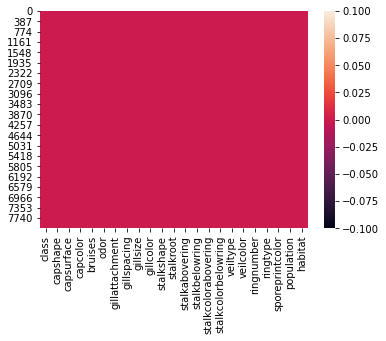

In [29]:
sns.heatmap(ds.isnull())

The heatmap also shows ther is no missing values

In [30]:
# Handeling the categorical Varibales
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1=['class','capshape','capsurface','capcolor','bruises','odor','gillattachment','gillspacing','gillsize',                   
'gillcolor','stalkshape','stalkroot','stalkabovering','stalkbelowring','stalkcolorabovering',
'stalkcolorbelowring','veiltype','veilcolor','ringnumber','ringtype','sporeprintcolor','population','habitat']     
for val in list1:
    ds[val] = le.fit_transform(ds[val].astype(str))
ds

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalkbelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Since all the coulmns are having categorical values , so we need to change them into numerical values using Labelencoder

# Summary Statistics

In [31]:
ds.describe()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalkbelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Key Observations:
1)From the table above it can be seen that the column "veiltype" is 0 and not contributing to the data we can remove it.
2))The mean and median(50%) is similar in all the column
3)Thers is not much differnce between the values of 75% aand max for all the columns.

In [32]:
# droping the column from dataset
ds.drop(['veiltype'],axis=1,inplace=True)

<AxesSubplot:>

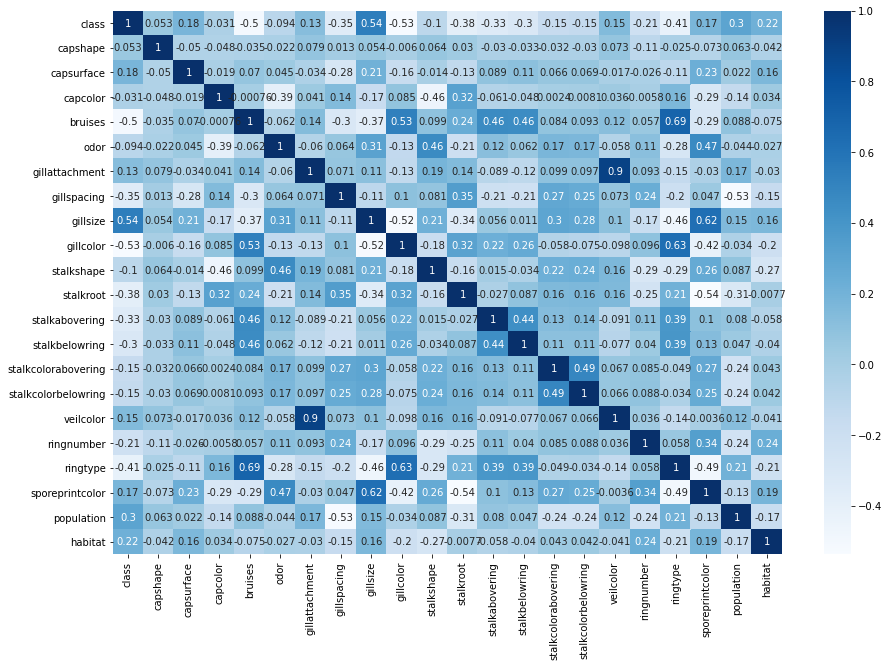

In [33]:
# Correlation Matrix ---Pearson Methos
fig =plt.figure(figsize=(15,10))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

Key Observations:
1)velicolur and gillattachment  are higly postively correlated
2)gillsize is positvely correlated with class variable
3) bruises, gilltype are positively correlated with ringtype

<AxesSubplot:xlabel='class', ylabel='count'>

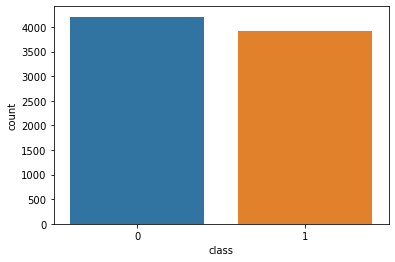

In [34]:
sns.countplot(x='class',data=ds)

There is no imbalance class in this case.

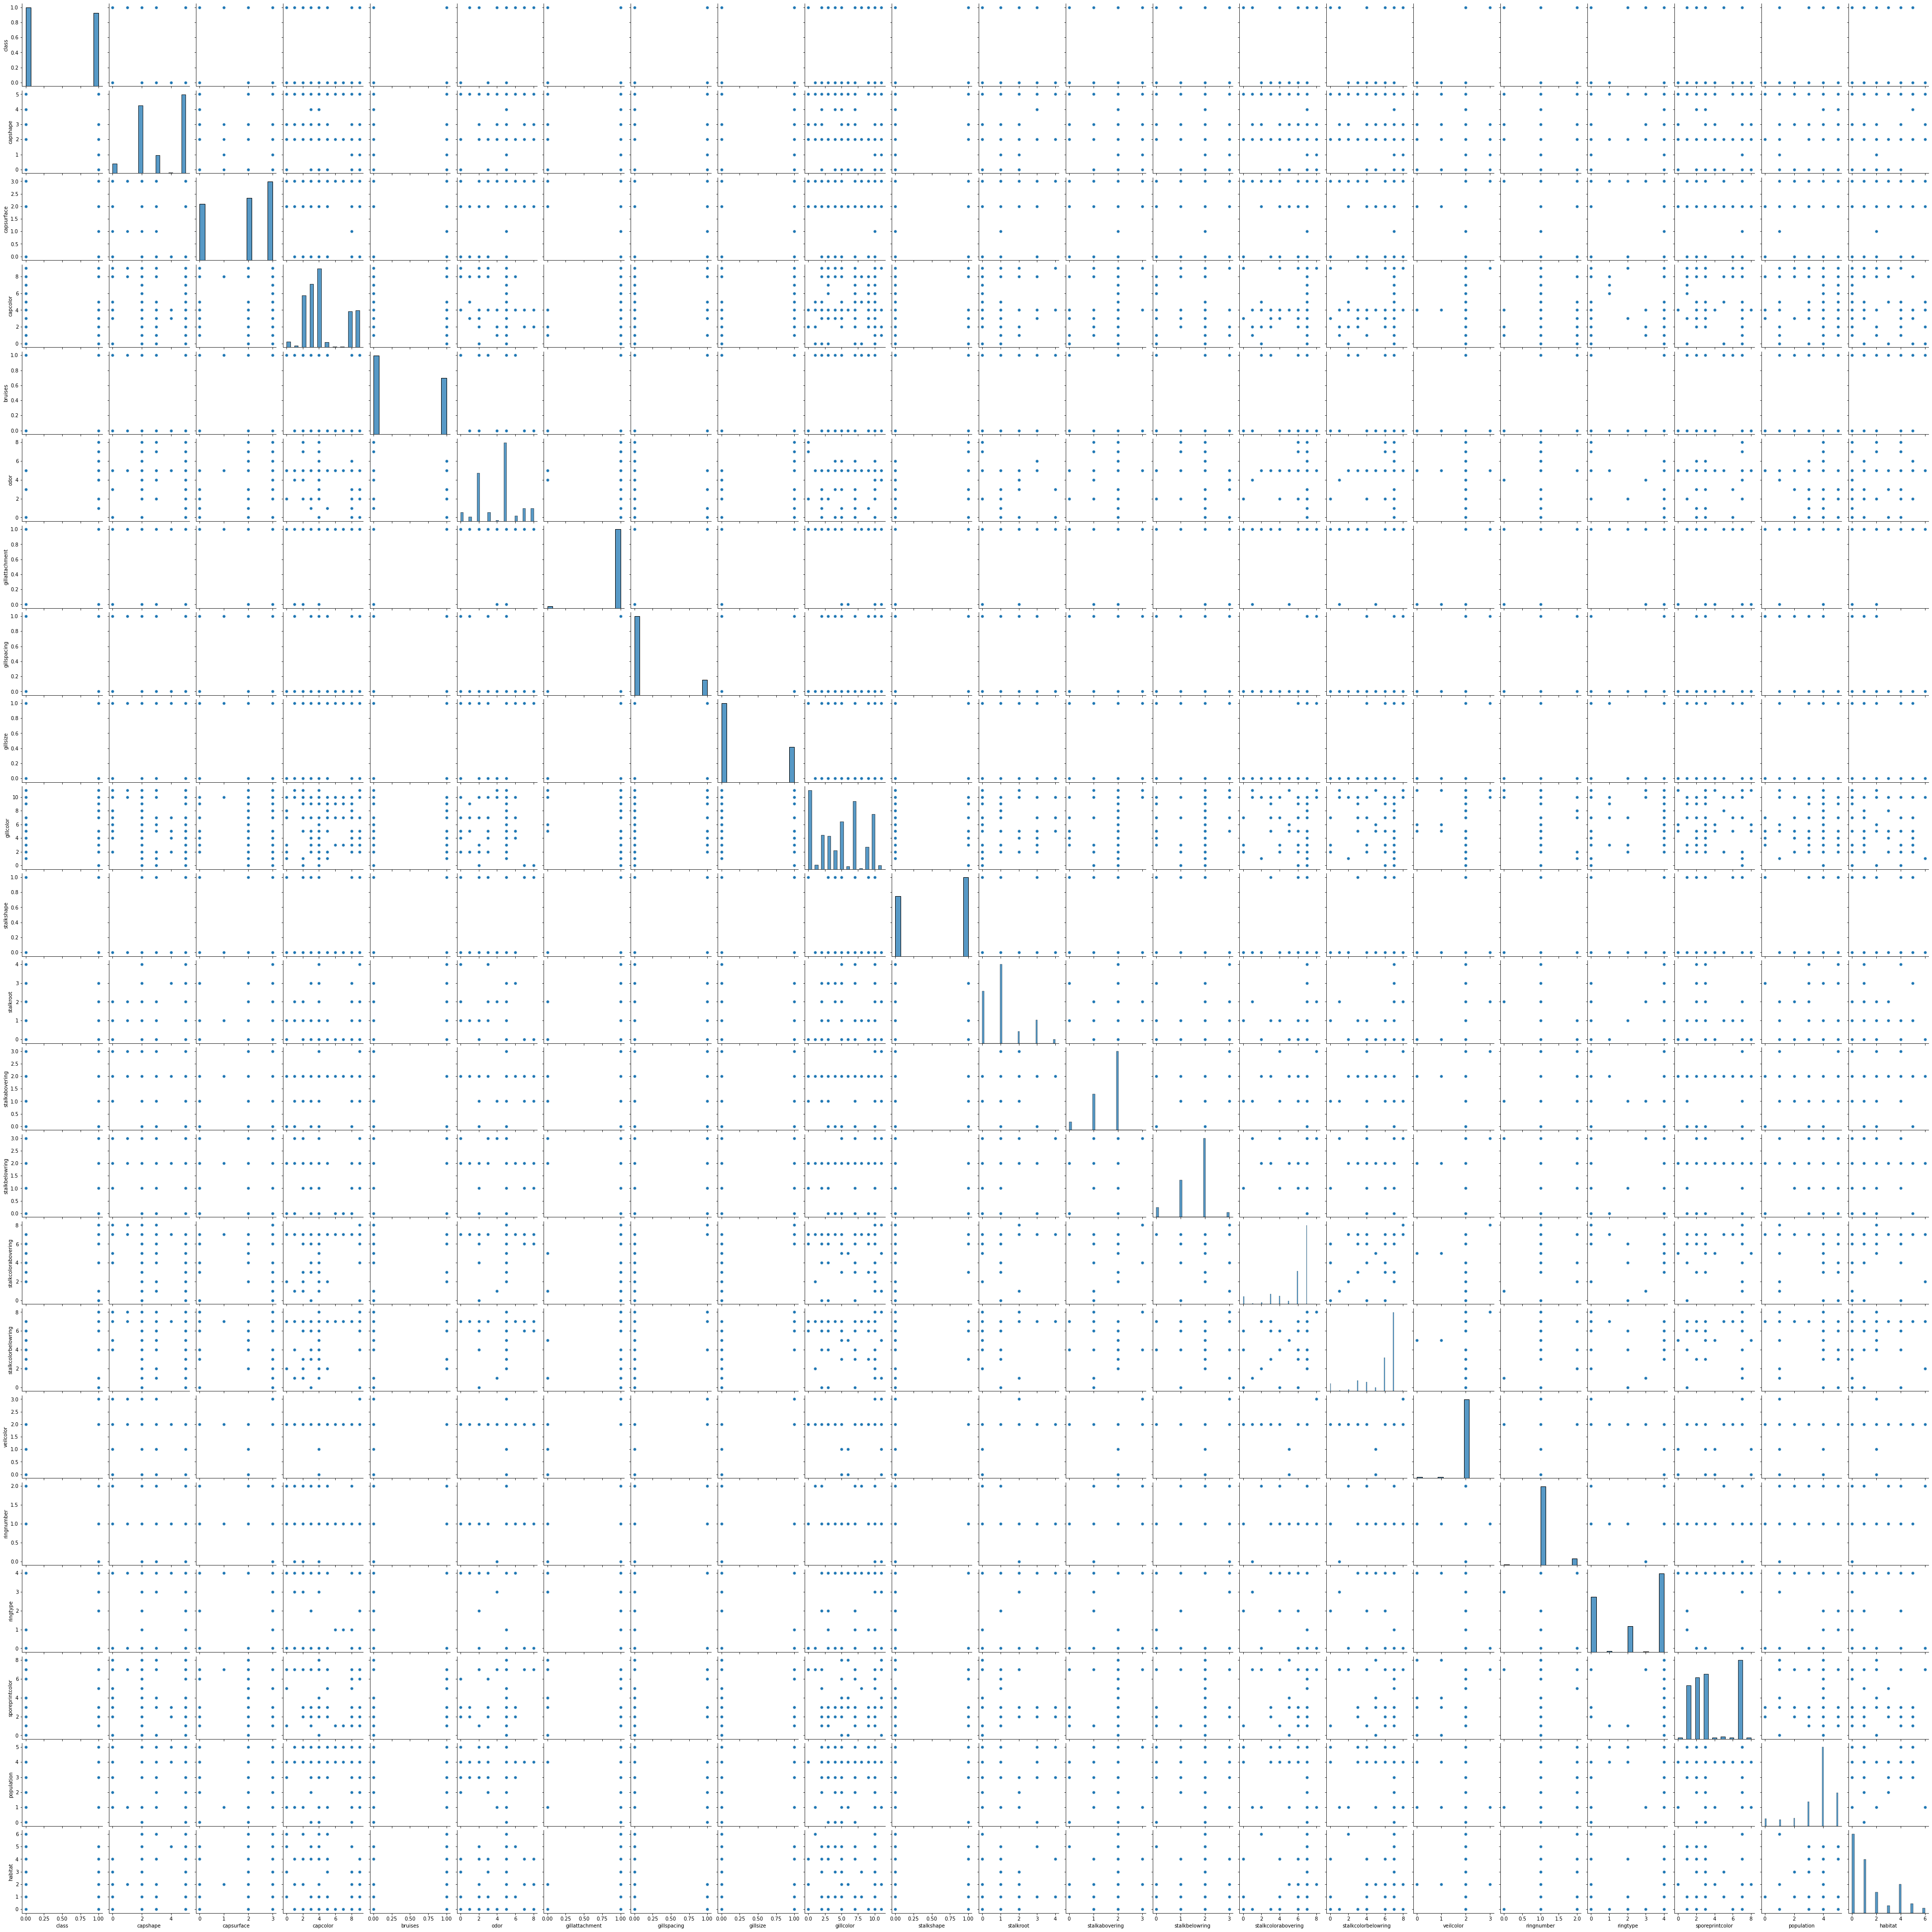

In [35]:
sns.pairplot(ds)

In [36]:
ds.shape

(8124, 22)

In [37]:
# Segregatting the data into features and target variable
x=ds.drop(columns=['class'])
y=ds['class']

In [38]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [39]:
# To find the best random state using Decision Tree Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9720357941834452 on random state 21


In [40]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 21)
(2438, 21)
(5686,)
(2438,)


70% of the data (5686 rows) will be available for training the model & 30% (2438 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore oue evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report

In [41]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9634946677604594
[[1223   45]
 [  44 1126]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [42]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9232977850697293
[[1167  101]
 [  86 1084]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1268
           1       0.91      0.93      0.92      1170

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [43]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [44]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [45]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=42)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [46]:
# Adaboost classifcation Model
ad= AdaBoostClassifier(n_estimators=50)
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Based on the results of above models, and capomaring the Accuracy score and other evalution matrics result of recall, precision.
                           Accuracy_Score     
1 LogisticRegression        0.96
2.Gauusian Naive_bayes      0.92
3 DecisionTreeClassifier    1         
4 KNeighbors Classifier     1
5 Random Forest classifier  1 
6.Adboost classifier        1
7. SVC                      1

Since the 5 models out of above 7 alogrithim gives perfect accuracy score(1), we will check the cross validation so which one is the best model out of the 5 model above. 

# Cross Validation

Cross check the accuracy of the algorithim used above

In [47]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
0.7259685486926866 0.15415819916568615


In [48]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.67876923 0.98215385 0.87569231 0.99815385 0.61576355]
0.8301065555134521 0.1563855764003133


In [49]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.84246154 1.         0.96       1.         0.54864532]
0.8702213717317167 0.1708373214891567


In [50]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.84246154 1.         0.93415385 1.         0.58805419]
0.8729339143615006 0.15370392638623823


In [51]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.84246154 1.         1.         1.         0.67549261]
0.9035908298597954 0.1293443250006686


In [52]:
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.84246154 1.         1.         1.         0.74384236]
0.9172607805987116 0.10602472252902088


It can be observed that for the Ada boost classifier algorithim the difference between the accuracy score of algorithim before and after 
the cross validation is minimum. So the best model with highet accuracy score and best on evalution with other matrix , Ada boost is the best model for predicting the class of mushroom.

# HyperParmeter tuning

In [53]:
from sklearn.model_selection import GridSearchCV 
parameter={'random_state':np.arange(1,100),'algorithm':['SAMME', 'SAMME.R']}

In [54]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [55]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'random_state': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [56]:
GCV.best_params_

{'algorithm': 'SAMME.R', 'random_state': 1}

In [58]:
final= AdaBoostClassifier(algorithm='SAMME.R', random_state= 1)
#Adabosstclassifier(100)----Default
final.fit(x_train,y_train)
predad=final.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Saving the best Model

In [59]:
import joblib
joblib.dump(final,'Model_Mushroom.obj')

['Model_Mushroom.obj']